# Linear Regression: Build from Scratch
It's a good idea to understand what's happening underneath the hood of a machine learning algorithm. What's a better way to understand an algorithm than building one from scratch?

In this notebook, I will build a single variable Linear Regression from scratch, and compare the recovered coefficients and intercept against SciKit-Learn's LinearRegression model.

In [116]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Let's get some sample data

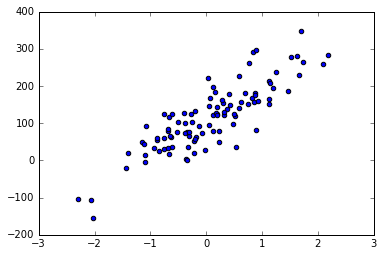

Coefficient: 80.7105195619
Bias: 100


In [119]:
sample_data = make_regression(n_samples=100,n_features=1,noise=50.0,random_state=1,coef=True,bias=100)
plt.scatter(x=sample_data[0],y=sample_data[1])
plt.show()

train_x = sample_data[0]
train_y = sample_data[1]

print 'Coefficient:',sample_data[2]
print 'Bias: 100'

# Building Linear Regression from scratch
Linear Regression works by finding a line defined as y = mx + b that minimizes the mean squared error of the predicted y values versus real y values, which is also known as the loss function. The way the algorithm can minimize the error is using a technique caled **Gradient Descent**.

In very simple terms, gradient descent can minimize any function by calculating the derivative of the function, which tells you the direction of where the function is heading. We use the calculated gradient, i.e. the direction of which the function is *rolling towards*, to update the **m** and **b** of our y = mx + b line with the goal of minimizing the error function. This updating is many times over, resulting in a final **m** and **b** which minimizes the error.

In [122]:
class Self_Built_LinearRegression():
    def __init__(self):
        # y_hat = mx + b
        self.iterations = 10000
        self.alpha = 0.001 # learning rate
        self.initial_m = float(0)
        self.initial_b = float(0)
        self.final_m = 0
        self.final_b = 0
        return None
    
    def gradient_descent(self,X,y,initial_m,initial_b):
        m = initial_m
        b = initial_b
        
        # Doing the gradient descent here. We need the partial derivatives of m and b
        # m: (2/n) * summation of (-x (y - (mx+b)))
        # b: (2/n) * summation of -(y - (mx+b))
        for i in range(self.iterations):
            m_gradient = float(0)
            b_gradient = float(0)
            
            # Loop to update the m and b gradient. The actual m and b values are not updated here yet.
            for i in range(self.len_of_X):
                m_gradient += -self.X[i] * (self.y[i]-(m*X[i]+b))
                b_gradient += -(self.y[i]-(m*X[i]+b))
            m_gradient = m_gradient * (2.0 / self.len_of_X)
            b_gradient = b_gradient * (2.0 / self.len_of_X)
            
            # Updating the m and b values after we have calculated gradient
            m = m - self.alpha * m_gradient
            b = b - self.alpha * b_gradient
            
        # After the iteration loop, m and b have gone through gradient descent and are now done
        return [m,b]
    
    def fit(self,X,y):
        # Get the data
        self.X = X
        self.y = y
        self.len_of_X = len(self.X)
        
        # Start gradient descent
        self.final_m, self.final_b = self.gradient_descent(self.X,self.y,self.initial_m,self.initial_b)
        
    
    def predict(self,X,y=None):
        # y_hat = mX+b
        y_hat = []
        for i in range(len(X)):
            y_hat.append(self.final_m * X[i] + self.final_b)
        return y_hat
        
self_model = Self_Built_LinearRegression()
self_model.fit(train_x,train_y)
self_model_predict = self_model.predict(train_x)

# Let's compare the self built linear regression model with SciKit-Learn's version

Self Built Linear Regression
y = [ 85.14545848]x + [ 110.13507451]
SciKit-Learn Linear Regression
y = [ 85.14546889]x + 110.135071944


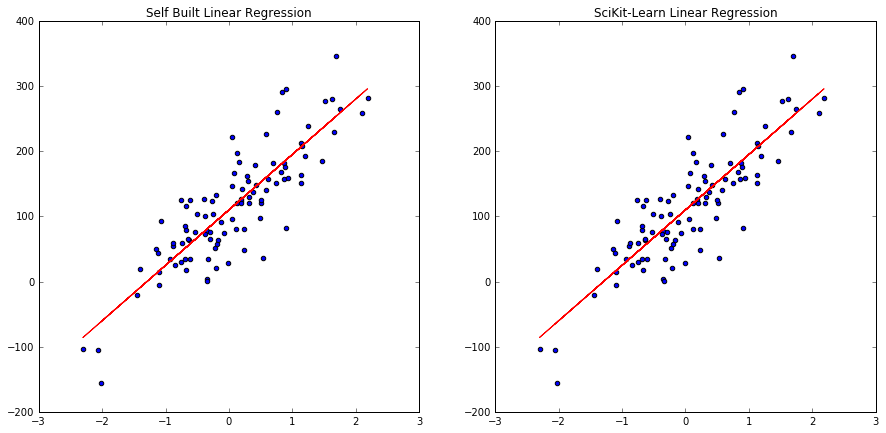

In [124]:
# SciKit-Learn's Linear Regression Implementation
model = LinearRegression()
model.fit(train_x,train_y)

pred = model.predict(train_x)

print 'Self Built Linear Regression'
print 'y = {}x + {}'.format(self_model.final_m,self_model.final_b)

print 'SciKit-Learn Linear Regression'
print 'y = {}x + {}'.format(model.coef_,model.intercept_)

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.scatter(train_x,train_y)
ax.plot(train_x,self_model_predict,c='r')
ax.set_title('Self Built Linear Regression')

ax = fig.add_subplot(1,2,2)
ax.scatter(train_x,train_y)
ax.plot(train_x,pred,c='r')
ax.set_title('SciKit-Learn Linear Regression')
plt.show()